In [1]:
from ipynb.fs.defs.MLCP_EDA import data_importing, replace_numbers_with_letters
import pandas as pd
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assessing feature importance thanks to XGBoost (gradient-boosted tree regressor model)

In [2]:
# Import the dataset of features and target, and merge them together
data = data_importing(verbose = False)
dataset = pd.concat([data[1], replace_numbers_with_letters(data[-1], mode = 'label')], axis = 1)

# Print a row as example
print('Sample dataset:\n', dataset.head(1).T)

Sample dataset:
                              0
b'j_zlogz'           -3.488422
b'j_c1_b0_mmdt'       0.471864
b'j_c1_b1_mmdt'       0.058537
b'j_c1_b2_mmdt'       0.014659
b'j_c2_b1_mmdt'       0.109481
b'j_c2_b2_mmdt'       0.025472
b'j_d2_b1_mmdt'       1.870292
b'j_d2_b2_mmdt'       1.737580
b'j_d2_a1_b1_mmdt'    1.870292
b'j_d2_a1_b2_mmdt'    0.211365
b'j_m2_b1_mmdt'       0.089198
b'j_m2_b2_mmdt'       0.032309
b'j_n2_b1_mmdt'       0.331585
b'j_n2_b2_mmdt'       0.155772
b'j_mass_mmdt'      141.861038
b'j_multiplicity'    85.000000
label                 0.000000


In [6]:
# 80% of the dataset will be used as train and the remaining part as testing
# Using "stratify" we make sure the random shuffling will take into account the original distribution of each class

X_train, X_test, y_train, y_test = train_test_split(
    dataset.iloc[:,:16], dataset.iloc[:,-1], test_size=0.2, stratify=dataset.iloc[:,-1], random_state=42)

Actual class vs. predicted: 
       y_test  y_pred
4298       1     1.0
9908       4     4.0
1473       3     3.0
3028       0     4.0
1322       3     1.0
9835       1     1.0
8123       2     2.0
5515       3     1.0
7329       4     4.0
3105       4     4.0

 Classification report:
               precision    recall  f1-score   support

           0       0.70      0.75      0.72       394
           1       0.60      0.75      0.66       394
           2       0.83      0.75      0.79       393
           3       0.91      0.72      0.81       405
           4       0.81      0.81      0.81       414

    accuracy                           0.76      2000
   macro avg       0.77      0.75      0.76      2000
weighted avg       0.77      0.76      0.76      2000



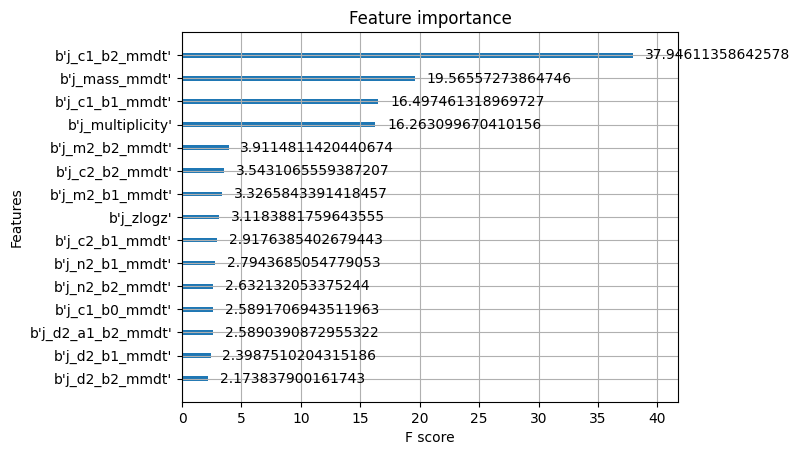

In [21]:
# Dirty work for gradient boosting; naive model used below

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

param = {'max_depth': 5,
         'eta': 0.3,
         'objective': 'multi:softmax',
         'num_class': 5}

num_round = 20

model = xgb.train(param, dtrain, 20)
y_pred = model.predict(dtest)

# Print actual class vs. predicted
print('Actual class vs. predicted: \n', pd.DataFrame({'y_test': y_test[:10], 'y_pred': y_pred[:10]}))

# macro avg row as benchmark
print('\n Classification report:\n', classification_report(y_test, y_pred))

# "gain" importance type tells how much the performance of a model increases once you add that variable to the tree
xgb.plot_importance(model, importance_type='gain');